In [45]:
import tensorflow as tf

import matplotlib.pyplot as plt

%matplotlib inline

In [46]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [47]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, stratify=y_train)

In [48]:
print("Training set shape:", x_train.shape, y_train.shape)
print("Validation set shape:", x_val.shape, y_val.shape)
print("Test set shape:", x_test.shape, y_test.shape)


Training set shape: (35000, 32, 32, 3) (35000, 1)
Validation set shape: (15000, 32, 32, 3) (15000, 1)
Test set shape: (10000, 32, 32, 3) (10000, 1)


In [49]:
# Making sure that the values are float so that we can get decimal points after normalisation
x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_test = x_test.astype('float32')

In [50]:
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_val /= 255
x_test /= 255

In [51]:
input_shape = (32, 32, 3)

In [59]:
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024,activation='relu'))
model.add(Dense(10, activation='softmax'))

In [60]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 dropout_9 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_17 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 dropout_10 (Dropout)        (None, 16, 16, 64)        0         
                                                      

In [61]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = tf.keras.callbacks.ModelCheckpoint('best_model.hdf5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [62]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x=x_train,
                    y=y_train,
                    epochs=10,
                    verbose=1,
                    callbacks=[es,mc],
                    validation_data=(x_val, y_val))

Epoch 1/10
1091/1094 [============================>.] - ETA: 0s - loss: 1.5087 - accuracy: 0.4532
Epoch 1: val_accuracy improved from -inf to 0.58487, saving model to best_model.hdf5
1094/1094 [==============================] - 10s 8ms/step - loss: 1.5076 - accuracy: 0.4536 - val_loss: 1.1677 - val_accuracy: 0.5849
Epoch 2/10
1089/1094 [============================>.] - ETA: 0s - loss: 1.0734 - accuracy: 0.6166
Epoch 2: val_accuracy improved from 0.58487 to 0.64760, saving model to best_model.hdf5
1094/1094 [==============================] - 7s 7ms/step - loss: 1.0733 - accuracy: 0.6165 - val_loss: 0.9960 - val_accuracy: 0.6476
Epoch 3/10
1092/1094 [============================>.] - ETA: 0s - loss: 0.8655 - accuracy: 0.6909
Epoch 3: val_accuracy improved from 0.64760 to 0.66927, saving model to best_model.hdf5
1094/1094 [==============================] - 8s 7ms/step - loss: 0.8654 - accuracy: 0.6910 - val_loss: 0.9578 - val_accuracy: 0.6693
Epoch 4/10
1089/1094 [=======================

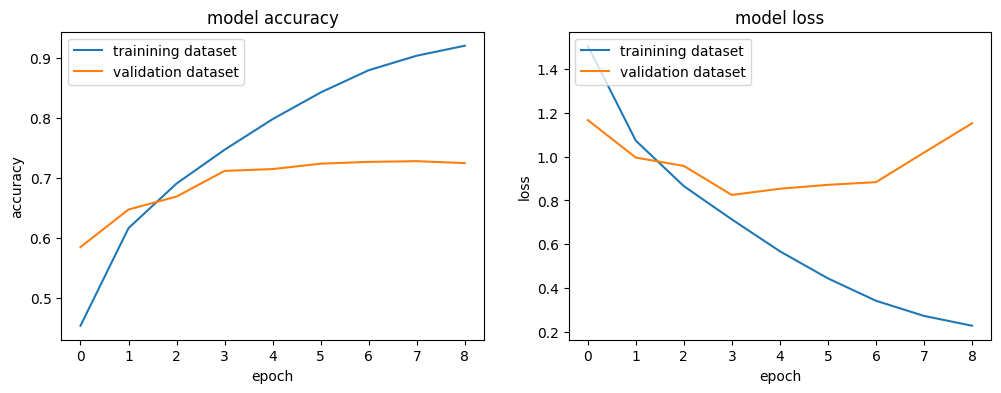

In [63]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

# summarize history for accuracy
ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_title('model accuracy')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.legend(['trainining dataset', 'validation dataset'], loc='upper left')
# summarize history for loss
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['trainining dataset', 'validation dataset'], loc='upper left')

plt.show()

In [64]:
saved_model = tf.keras.models.load_model('best_model.hdf5')

In [66]:
loss_val, acc_val = saved_model.evaluate(x_test, y_test, verbose=1)
print('Test Accuracy: %.3f' % acc)


313/313 [==============================] - 1s 3ms/step - loss: 1.0260 - accuracy: 0.7250
Test Accuracy: 0.719
